Convolutional Neural Network

In deep learning, a convolutional neural network (CNN/ConvNet) is a class of deep neural networks, most commonly applied to analyze visual imagery.

It uses a special technique called Convolution. Now in mathematics convolution is a mathematical operation on two functions that produces a third function that expresses how the shape of one is modified by the other.

Bottom line is that the role of the ConvNet is to reduce the images into a form that is easier to process, without losing features that are critical for getting a good prediction.

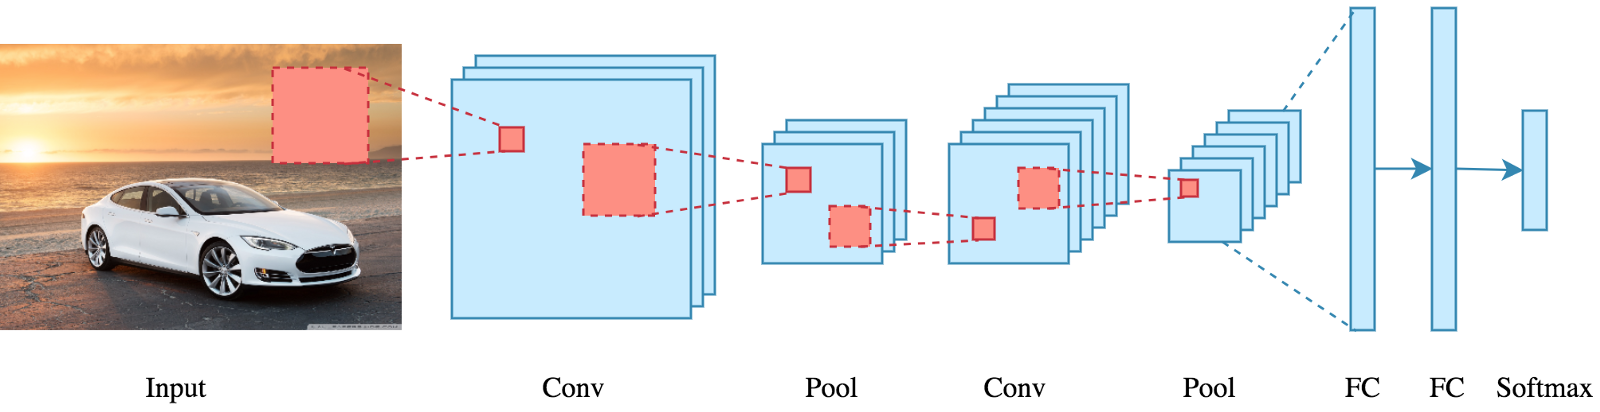

What is a convolution?

A convolution is a mathematical operation of applying a filter over a (matrix) input.
A filter (kernel) has the input shape specified by the ML engineer. The shape must be less than the shape of the input data.
The values of a filter are the weights of an artificial neutal network (they are modified as the training goes on to better fit the data).

Example of convolution: grayscale

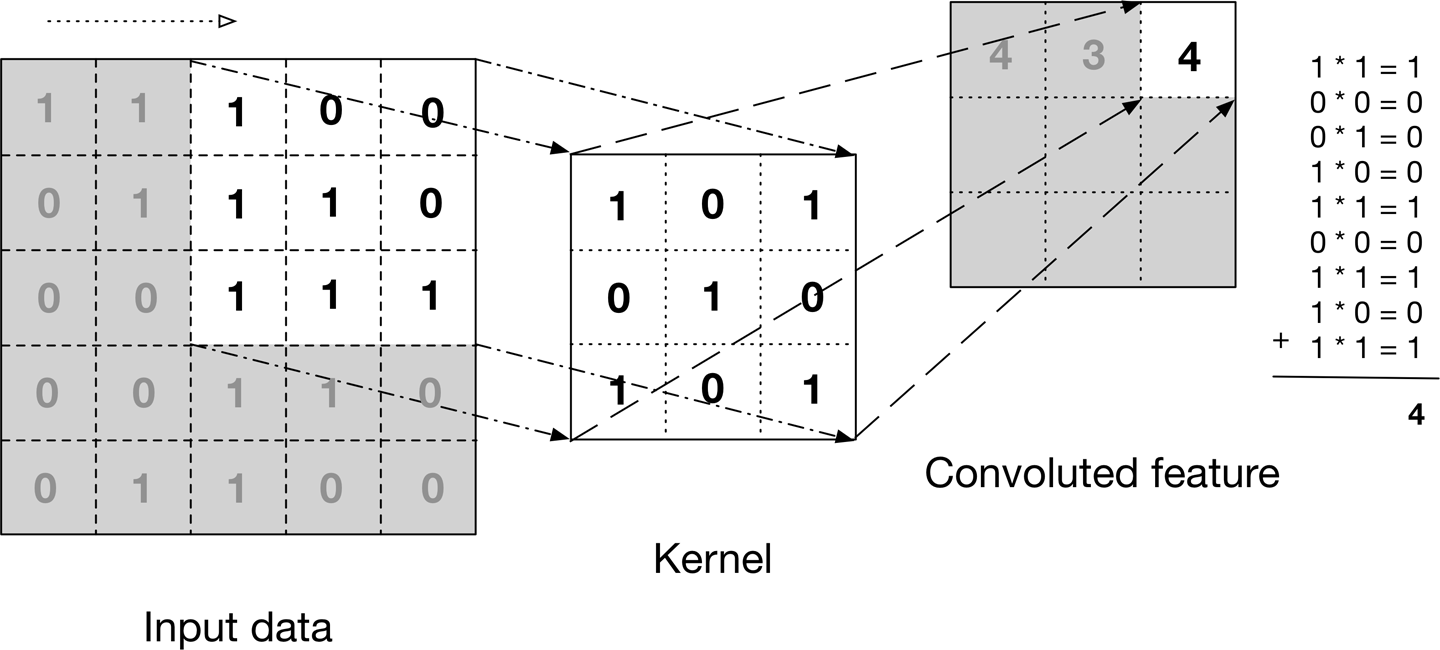

Example of convolution: RGB

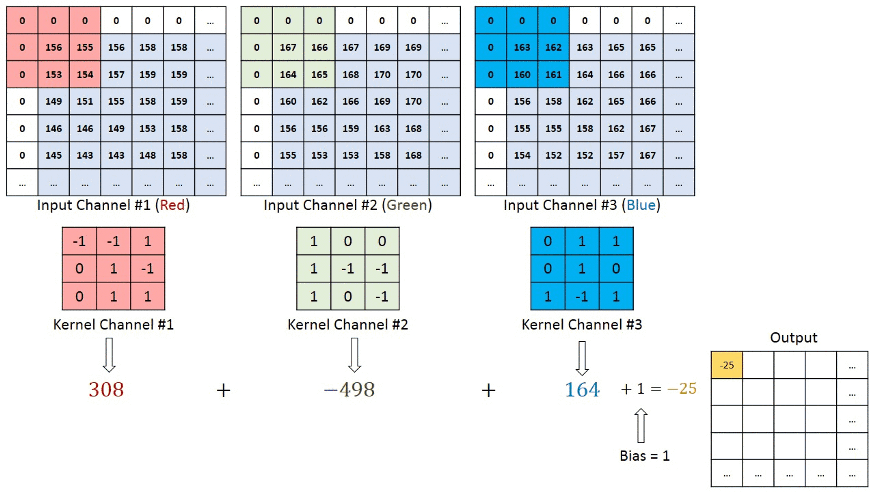

Average and max pooling

A problem with the output feature maps is that they are sensitive to the location of the features in the input. One approach to address this sensitivity is to down sample the feature maps. This has the effect of making the resulting down sampled feature maps more robust to changes in the position of the feature in the image.

The pooling operation is specified, rather than learned. Two common functions used in the pooling operation are:
 - Average Pooling: Calculate the average value for each patch on the feature map.
 - Maximum Pooling (or Max Pooling): Calculate the maximum value for each patch of the feature map.

The size of the pooling operation or filter is smaller than the size of the feature map; specifically, it is almost always 2×2 pixels applied with a stride of 2 pixels.

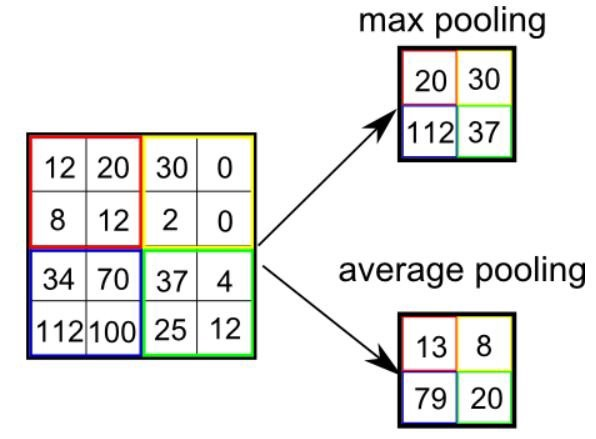

Exercise !!! - MNIST dataset

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
plt.rcParams['figure.figsize'] = [15, 15]

In [ ]:
def show_filters(layer, n_filters):
    filters, biases = layer.get_weights()

    # plot first few filters
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]

        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, i + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, 0], cmap='gray')

    # show the figure
    plt.show()

In [ ]:
def show_feature_maps(feature_maps, square_len):
    for i in range(square_len):
        # specify subplot and turn of axis
        ax = plt.subplot(square_len, 2, i + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    # show the figure
    plt.show()

In [ ]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

In [ ]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
# TODO: Normalize

# TODO: Make sure images have shape (28, 28, 1)

In [ ]:
input_shape = (28, 28, 1)
classes = 10

In [ ]:
# TODO: Change y to categorical data

In [ ]:
# summarize updated dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print(y_train[0])

In [ ]:
# TODO: create the model architecture
model = tf.keras.Sequential([
])

# TODO: Compile the model
model.compile(loss='', optimizer='')


model.summary()

In [ ]:
show_filters(model.layers[0], 8)

In [ ]:
model_1 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[0].output)

img = x_train[0]
img = np.expand_dims(img, axis=0)

feature_maps = model_1.predict(img)
show_feature_maps(feature_maps, 8)

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

In [ ]:
score = model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])